In [1]:
import vaex
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from scipy import interpolate
from os.path import join, abspath
import sys
from os import pardir

In [4]:
current = abspath('')
root_dir = abspath(join(current, pardir))
root_dir

'/home2/s20321005/Thesis-Project'

In [5]:
if root_dir not in sys.path:
    sys.path.append(root_dir)



In [6]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [7]:
neighbour_dir = join(root_data_dir, "Neighbour")
neighbour_dir

'/home2/s20321005/Thesis-Project/Data/Neighbour'

In [39]:
df = vaex.open(join(neighbour_dir, "gaia-neighbour.hdf5"))
df

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u
0,0.010526307611580561,-1.5069479765134466,11.213000297546387,10.416000366210938,AAA,4616283493156832640,64.95027923583984,-64.84678804028577,0.01238507591187954,3.665080655375059,0.01239001378417015,11.816099401085904,0.010756381787359715,13.398380279541016,14.354398727416992,12.430805206298828,817.9747314453125,2392.0107421875,1.0612295866012573,1.3268741369247437,2.1613254142300296,-0.5358186393427844,84.85199737548828,84.69239807128906,85.30039978027344,0.3553999960422516,0.3497999906539917,0.36230000853538513,nan,nan,nan,M,00022474-8620303,1,222,--,32.41990661621094,gaia,1.0216929912567139,1.0216929912567139,1.0,3918.379638671875,gspphot,5.97119140625,8.631103515625,0.0,4.763700008392334,gspphot,0.004499912261962891,0.010499954223632812,0.0,nan,--,nan,nan,nan,-0.4165000021457672,gspphot,0.039000004529953,0.03979998826980591,0.0,0.07999999821186066,gspspec,0.04999999888241291,0.07000000774860382,0.0,nan,--,nan,nan,nan,0.7969999313354492,6.575370976314297,84.63029685651593,-43.20758491657852,72.76944243086287,64.06734159660076,10.673072476874871,0.01238531435714347,0.012389775429348222,1.0216929912567139,4.281477484502003,25.70046077472735,0.006316063581639582,0.023917262738082538,-12.87039250998578,0.5216486401636996,30.062175421832617,0.8785096227461723,4.609353189730783,0.4895579458545102,-39.28106335498894,0.7298521839148095
1,0.009947399351986562,-1.4741853713800026,11.75,10.914999961853027,AAA,4617667606497642368,17.977584838867188,-0.17262960984553632,0.01500760018825531,17.976755781051242,0.01342449989169836,7.029261215530585,0.011353876441717148,13.687113761901855,14.494421005249023,12.808248519897461,1078.7208251953125,2067.694580078125,1.010115146636963,1.290492296218872,2.1699227065693796,-0.5677539259120619,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,00021678-8427525,1,222,--,48.249412536621094,gaia,1.7350472211837769,1.7350472211837769,1.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.8350000381469727,5.9845484125253865,142.2624610664035,-76.5001755789673,119.94303216551242,4.207349610198228,-17.47832253539565,0.01493170232219195,0.01350886843944294,1.7350472211837769,-11.786053509397416,2.837117093938337,-0.021104384113212568,0.011062597394465627,-35.88257568124676,0.9331734551441357,34.34177674400418,1.4628812519752585,-17.02308452820295,0.8250003773909808,-29.96033138143503,1.2081052585542995
2,0.010653943539778906,-1.4792054270009287,13.133999824523926,12.317000389099121,AAA,4617601567080525696,19.894350051879883,-18.57644369982859,0.03594500198960304,-7.12045526211935,0.03676403686404228,5.814933551816721,0.028319241479039192,15.729541778564453,17.00968360900879,14.611902236938477,176.59393310546875,689.6736450195312,1.0680480003356934,1.4013868570327759,2.168515313114387,-0.5628743542169623,171.8242950439453,170.56480407714844,174.2696075439453,0.426800012588501,0.4198000133037567,0.43299999833106995,nan,nan,nan,M,00022650-8445080,1,222,--,nan,--,nan,nan,nan,3588.7626953125,gspphot,3.59375,3.5283203125,0.0,4.771900177001953,gspphot,0.008300304412841797,0.006099700927734375,0.0,nan,--,nan,nan,nan,-0.03759999945759773,gspphot,0.016300000250339508,0.017299998551607132,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,0.8

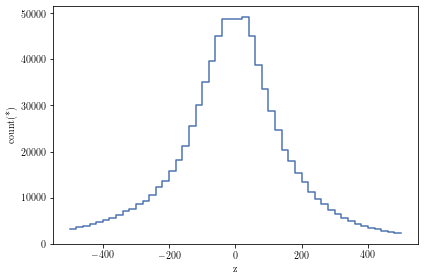

In [40]:
df.viz.histogram("z", shape=50)

In [41]:
from astroquery.utils.tap.core import TapPlus
# Vizier TAP service
tap = TapPlus(url="http://TAPVizieR.u-strasbg.fr/TAPVizieR/tap")

def query_vizier(query, verbose=False):
    """Query Vizier TAP service."""
    job = tap.launch_job(query, verbose=verbose)
    return job.get_results()

query = """
SELECT TOP 100000 Source, plx, glon, glat, PMemb, Cluster
FROM "J/A+A/618/A93/members"
WHERE plx > 0 AND 1000/plx < 1000 
"""

result = query_vizier(query)
result

Source,plx,GLON,GLAT,PMemb,Cluster
,mas,deg,deg,,
int64,float64,float64,float64,float64,object
51497864767442176,7.0159,170.8774790187,-24.0139737241,0.2,Melotte_22
51558956382579200,7.2931,170.660227799,-24.6422053481,0.1,Melotte_22
51616268426009472,7.4402,170.2788965833,-24.8422992871,1.0,Melotte_22
51619120284286976,7.3916,170.1785328624,-24.8281127315,0.9,Melotte_22
51677669278703104,7.5788,170.5413529051,-24.2020414637,0.7,Melotte_22
51694746068624128,7.2266,170.7950989841,-23.7781450767,1.0,Melotte_22
51717114258148864,7.1858,170.3945229144,-23.7775208459,0.2,Melotte_22
51742471745296768,7.4544,169.9875094794,-24.323109763,0.9,Melotte_22


In [36]:
# group by cluster
df_clusters = result.to_pandas().groupby("Cluster")
# get cluster names
cluster_names = df_clusters.groups.keys()
cluster_names

dict_keys(['ASCC_10', 'ASCC_101', 'ASCC_105', 'ASCC_107', 'ASCC_11', 'ASCC_111', 'ASCC_113', 'ASCC_114', 'ASCC_115', 'ASCC_12', 'ASCC_123', 'ASCC_127', 'ASCC_128', 'ASCC_13', 'ASCC_16', 'ASCC_19', 'ASCC_21', 'ASCC_23', 'ASCC_29', 'ASCC_30', 'ASCC_32', 'ASCC_41', 'ASCC_58', 'ASCC_66', 'ASCC_73', 'ASCC_79', 'ASCC_85', 'ASCC_87', 'ASCC_88', 'ASCC_90', 'ASCC_97', 'ASCC_99', 'Alessi_1', 'Alessi_10', 'Alessi_12', 'Alessi_13', 'Alessi_19', 'Alessi_2', 'Alessi_20', 'Alessi_21', 'Alessi_24', 'Alessi_3', 'Alessi_31', 'Alessi_37', 'Alessi_43', 'Alessi_44', 'Alessi_5', 'Alessi_6', 'Alessi_62', 'Alessi_8', 'Alessi_9', 'Alessi_Teutsch_11', 'Alessi_Teutsch_12', 'Alessi_Teutsch_3', 'Alessi_Teutsch_5', 'Alessi_Teutsch_8', 'Antalova_2', 'Aveni_Hunter_1', 'BDSB30', 'BDSB91', 'BDSB93', 'BDSB96', 'BH_164', 'BH_221', 'BH_23', 'BH_56', 'BH_99', 'Berkeley_59', 'Blanco_1', 'Collinder_132', 'Collinder_135', 'Collinder_140', 'Collinder_197', 'Collinder_338', 'Collinder_350', 'Collinder_359', 'Collinder_394', 'Co

In [37]:
# filter out members with PMemb < 0.5
result = result[result["PMemb"] > 0.5]
result

Source,plx,GLON,GLAT,PMemb,Cluster
,mas,deg,deg,,
int64,float64,float64,float64,float64,object
51616268426009472,7.4402,170.2788965833,-24.8422992871,1.0,Melotte_22
51619120284286976,7.3916,170.1785328624,-24.8281127315,0.9,Melotte_22
51677669278703104,7.5788,170.5413529051,-24.2020414637,0.7,Melotte_22
51694746068624128,7.2266,170.7950989841,-23.7781450767,1.0,Melotte_22
51742471745296768,7.4544,169.9875094794,-24.323109763,0.9,Melotte_22
51760270089541504,7.0455,170.2331075522,-23.8273629767,0.6,Melotte_22
51765595848971648,7.1487,170.3096287001,-23.7271393553,0.6,Melotte_22
53206780715340032,7.416,170.6041870361,-23.4478852618,0.7,Melotte_22


In [42]:
# Hyades

query = """
SELECT TOP 10000 Memb, HIP,plx	
FROM "J/A+A/331/81/table2"
"""

hyades = query_vizier(query)
hyades = hyades.to_pandas()
hyades = hyades[hyades["Memb"] == "1"]
hyades

,Memb,HIP,plx
1,1,10672,15.37
3,1,12709,53.89
5,1,13117,29.67
6,1,13600,18.89
8,1,13806,25.77
...,...,...,...
263,1,24923,18.26
265,1,25639,11.58
271,1,26382,18.56
278,1,28356,14.87


In [43]:
# crossmatch to gaia
from astroquery.gaia import Gaia
query_gaia = f"""
SELECT TOP 100000 gaia.source_id, ra, dec, parallax, original_ext_source_id AS hip
FROM gaiadr3.gaia_source AS gaia
JOIN gaiadr3.hipparcos2_best_neighbour AS hipparcos ON hipparcos.source_id = gaia.source_id
WHERE parallax > 0 AND 1000/parallax < 300
"""
job_gaia = Gaia.launch_job(query_gaia)
gaia = job_gaia.get_results()
gaia = gaia.to_pandas()
gaia

,source_id,ra,dec,parallax,hip
0,7632157690368,45.034343,0.235390,5.602294,13989
1,44358422235136,45.501454,0.497697,9.558267,14113
2,83154862613888,44.937316,0.623793,15.672104,13957
3,132667245587072,45.072796,0.969971,5.737754,14003
4,148953761446272,45.656686,0.848683,5.472354,14164
...,...,...,...,...,...
58057,6916866026425956352,313.813957,-1.972894,6.375869,103266
58058,6916948176264955392,313.784539,-1.372914,11.553046,103261
58059,6916960034670493440,313.725728,-1.375816,13.469747,103237
58060,6917116130961541120,315.873033,-1.579706,20.718128,103931


In [44]:
gaia_hyades = gaia[gaia.hip.isin(hyades["HIP"])]
gaia_hyades.reset_index(drop=True, inplace=True)
gaia_hyades

,source_id,ra,dec,parallax,hip
0,8479094371605632,45.013188,7.749849,42.078085,13976
1,10584899657116672,49.360689,7.655783,21.272281,15304
2,10608573516849536,49.387341,7.690126,21.226137,15310
3,11037726649058432,50.122663,8.454478,31.603160,15563
4,35442864696220032,43.818418,17.891653,18.768039,13600
...,...,...,...,...,...
137,3413146914553161728,71.859498,23.050739,18.236671,22253
138,3414082525931242368,77.698249,20.569059,12.200862,24116
139,3422091372924795776,77.438184,28.030211,15.342843,24019
140,3431617850909731200,90.154208,29.005057,10.992923,28469


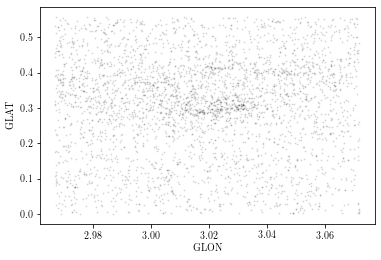

In [53]:
df_filtered = df[~df.source_id.isin(result["Source"])]
df_filtered_2 = df_filtered[~df_filtered.source_id.isin(gaia_hyades["source_id"])].extract()
inspect = df_filtered_2.filter("GLAT < 32*3.141592653589793/180").filter("GLAT > 0").filter("GLON > 170*3.141592653589793/180").filter("GLON < 176*3.141592653589793/180")

inspect.viz.scatter("GLON", "GLAT", s=1, alpha=0.1, c="k")

In [57]:
# l = inspect['GLON'].to_numpy()
# b = inspect['GLAT'].to_numpy()
# p = inspect['parallax'].to_numpy()
# d = 1000/p

# # plot 3D
# from mpl_toolkits.mplot3d import Axes3D

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(l, b, d, s=1, alpha=1, c="k")
# ax.set_xlabel("GLON")
# ax.set_ylabel("GLAT")
# ax.set_zlabel("Distance (pc)")


In [58]:
# w = inspect['w'].to_numpy()

# plt.hist(w, bins=30)

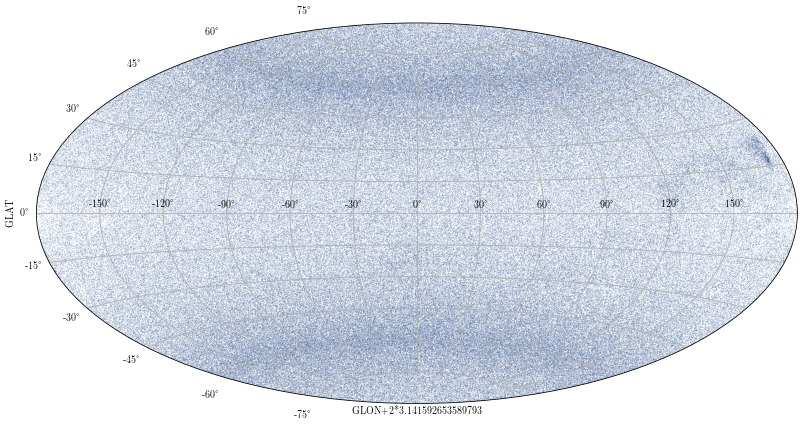

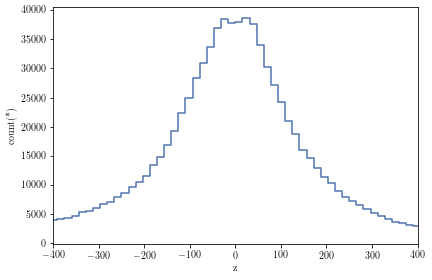

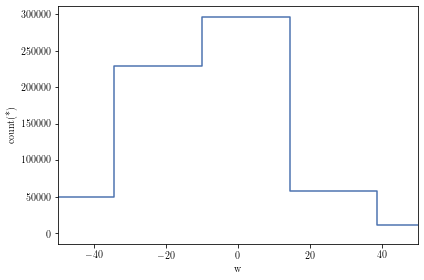

843952 845141


In [48]:

offset = -1 #np.pi/2
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')
df_filtered_2.viz.scatter(f"GLON-{1+offset}*3.141592653589793", "GLAT", length_check=False, s=0.001, alpha=1, c="C0")
df_filtered_2.viz.scatter(f"GLON+{1-offset}*3.141592653589793", "GLAT", length_check=False, s=0.001, alpha=1,c="C0")
plt.grid(True)
plt.show()
df_filtered_2.viz.histogram("z")
plt.xlim(-400, 400)
plt.show()
df_filtered_2.viz.histogram("w")
plt.xlim(-50, 50)
plt.show()

# df_filtered_2.export(join(neighbour_dir, "clustered.hdf5"), progress=True)
print(len(df_filtered_2), len(df))
# print("=================================")
